In [79]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import math
import matplotlib.pyplot as plt

# Preprocessing

In [80]:
f = open("data/shakespear_dataset.txt", "r")
text = f.read()

dictionary = []
for i in text:
    if i not in dictionary:
        dictionary.append(i)
#print(dictionary)

chunk_len = 200
print()
dataset = []
k = 0
for i in range(math.floor(len(text)/chunk_len)):
    word = []
    for j in range(k,k+chunk_len):
        word.append(text[j])
    k += chunk_len
    dataset.append(word)
#dataset = text.split()
#print(dataset)


In [3]:
print(dictionary)

['F', 'i', 'r', 's', 't', ' ', 'C', 'z', 'e', 'n', ':', '\n', 'B', 'f', 'o', 'w', 'p', 'c', 'd', 'a', 'y', 'u', 'h', ',', 'm', 'k', '.', 'A', 'l', 'S', 'Y', 'v', '?', 'R', 'M', 'W', "'", 'L', 'I', 'N', 'g', ';', 'b', '!', 'O', 'j', 'V', '-', 'T', 'H', 'E', 'U', 'D', 'P', 'q', 'x', 'J', 'G', 'K', 'Q', '&', 'Z', 'X', '3']


In [4]:
print(dataset[0])

['F', 'i', 'r', 's', 't', ' ', 'C', 'i', 't', 'i', 'z', 'e', 'n', ':', '\n', 'B', 'e', 'f', 'o', 'r', 'e', ' ', 'w', 'e', ' ', 'p', 'r', 'o', 'c', 'e', 'e', 'd', ' ', 'a', 'n', 'y', ' ', 'f', 'u', 'r', 't', 'h', 'e', 'r', ',', ' ', 'h', 'e', 'a', 'r', ' ', 'm', 'e', ' ', 's', 'p', 'e', 'a', 'k', '.', '\n', '\n', 'A', 'l', 'l', ':', '\n', 'S', 'p', 'e', 'a', 'k', ',', ' ', 's', 'p', 'e', 'a', 'k', '.', '\n', '\n', 'F', 'i', 'r', 's', 't', ' ', 'C', 'i', 't', 'i', 'z', 'e', 'n', ':', '\n', 'Y', 'o', 'u', ' ', 'a', 'r', 'e', ' ', 'a', 'l', 'l', ' ', 'r', 'e', 's', 'o', 'l', 'v', 'e', 'd', ' ', 'r', 'a', 't', 'h', 'e', 'r', ' ', 't', 'o', ' ', 'd', 'i', 'e', ' ', 't', 'h', 'a', 'n', ' ', 't', 'o', ' ', 'f', 'a', 'm', 'i', 's', 'h', '?', '\n', '\n', 'A', 'l', 'l', ':', '\n', 'R', 'e', 's', 'o', 'l', 'v', 'e', 'd', '.', ' ', 'r', 'e', 's', 'o', 'l', 'v', 'e', 'd', '.', '\n', '\n', 'F', 'i', 'r', 's', 't', ' ', 'C', 'i', 't', 'i', 'z', 'e', 'n', ':', '\n', 'F', 'i', 'r', 's', 't', ',', ' ', '

In [5]:
def index(x):
    i = 0
    for k in dictionary:
        if x == k:
            return i
        else:
            i += 1

def one_hot(character):
    identity = np.identity(len(dictionary))
    i = index(character)
    one_h = identity[i]
    return np.array(one_h)

In [6]:
x = []
y = []
for xe in dataset:
    ind = len(xe)
    y_word = xe[1:]
    
    x_word = xe[:ind-1]
    x_one_hot = []
    y_one_hot = []
    for xc, yc in zip(x_word, y_word):
        x_one_hot.append(one_hot(xc))
        y_one_hot.append(one_hot(yc))
    x.append(np.array(x_one_hot))
    y.append(np.array(y_one_hot))
x = np.array(x)
y = np.array(y)
print("First word in x:")
print(x[0])
print("First word in y:")
print(y[0])

First word in x:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First word in y:
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6, random_state=None, shuffle=False, stratify=None)


# Model

In [147]:
rnn = keras.Sequential()
rnn.add(keras.layers.Input(shape=(None, len(dictionary))))
#rnn.add(keras.layers.Embedding(input_dim=len(dictionary), output_dim=2, mask_zero=True))
rnn.add(keras.layers.GRU(300, return_sequences=True))
rnn.add(keras.layers.LSTM(200, return_sequences=True))
rnn.add(keras.layers.Dense(len(dictionary), activation=keras.activations.softmax))
rnn.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_24 (GRU)                 (None, None, 300)         329400    
_________________________________________________________________
lstm_13 (LSTM)               (None, None, 200)         400800    
_________________________________________________________________
dense_27 (Dense)             (None, None, 64)          12864     
Total params: 743,064
Trainable params: 743,064
Non-trainable params: 0
_________________________________________________________________


# Training

In [148]:
opt = keras.optimizers.Adam(learning_rate=0.01)
loss_fn = keras.losses.CategoricalCrossentropy(from_logits=False)
rnn.compile(optimizer=opt, 
            loss=loss_fn,
            metrics=['accuracy'])

history = rnn.fit(x=x_train, y=y_train, batch_size=100, epochs=40, validation_split=0.4)

Epoch 1/40
21/21 [==============================] - 54s 3s/step - loss: 3.5216 - accuracy: 0.1232 - val_loss: 3.5112 - val_accuracy: 0.0509
Epoch 2/40
21/21 [==============================] - 53s 3s/step - loss: 3.1883 - accuracy: 0.1661 - val_loss: 2.9005 - val_accuracy: 0.2350
Epoch 3/40
21/21 [==============================] - 53s 3s/step - loss: 2.6758 - accuracy: 0.2688 - val_loss: 2.5125 - val_accuracy: 0.2965
Epoch 4/40
21/21 [==============================] - 53s 3s/step - loss: 2.4001 - accuracy: 0.3207 - val_loss: 2.3523 - val_accuracy: 0.3314
Epoch 5/40
21/21 [==============================] - 53s 3s/step - loss: 2.2475 - accuracy: 0.3614 - val_loss: 2.2666 - val_accuracy: 0.3604
Epoch 6/40
21/21 [==============================] - 52s 2s/step - loss: 2.1324 - accuracy: 0.3922 - val_loss: 2.1632 - val_accuracy: 0.3836
Epoch 7/40
21/21 [==============================] - 52s 2s/step - loss: 2.0196 - accuracy: 0.4199 - val_loss: 2.0889 - val_accuracy: 0.4041
Epoch 8/40
21/21 [==

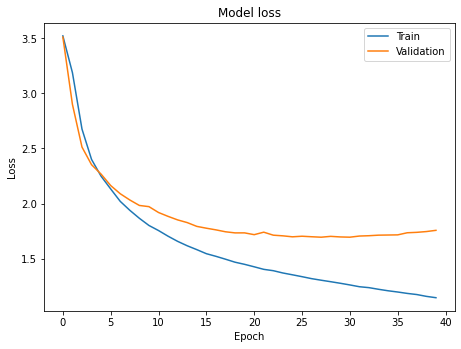

In [149]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

Text(0.5, 0, 'Epoch')

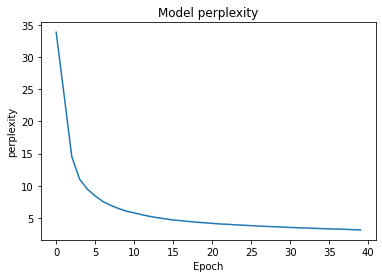

In [150]:
l = history.history["loss"]
exp_loss = tf.exp(l)
plt.plot(exp_loss)
plt.title('Model perplexity')
plt.ylabel('perplexity')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

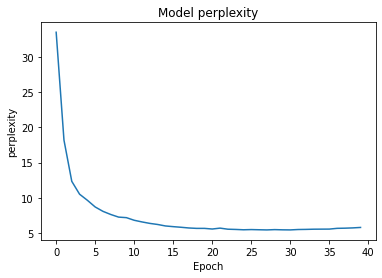

In [151]:
l = history.history["val_loss"]
exp_loss = tf.exp(l)
plt.plot(exp_loss)
plt.title('Model perplexity')
plt.ylabel('perplexity')
plt.xlabel('Epoch')

In [152]:
rnn.evaluate(x_test, y_test)

70/70 [==============================] - 20s 290ms/step - loss: 1.8881 - accuracy: 0.4922


[1.8880749940872192, 0.4922167956829071]

In [153]:
def evaluate(model, prime_str, predict_len):
    model.reset_states(states=[np.zeros((100, nodes)), np.zeros((batch_size, nodes))])
    predicted = prime_str
    #priming
    for char in prime_str:
        one_hot_char = one_hot(char)
        one_hot_char = np.reshape(one_hot_char, (1, 64))
        output = model.predict(np.array([one_hot_char]))
    inp = one_hot(prime_str[-1])
    
    for i in range(predict_len):
        inp = np.reshape(inp, (1, 64))
        output = model.predict(np.array([inp]))
        prediction = dictionary[np.argmax(output)]
        predicted += prediction
        inp = output
    return predicted

In [154]:
import random
def generate_primer(length):
    string = ""
    for i in range(length):
        index = random.randint(0, len(dictionary)-1)
        string += dictionary[index]
    return string

In [155]:
pr = generate_primer(5)
print(pr)
test = evaluate(rnn, pr, 100)
print(test)
print(len(test))

ICDgV
ICDgVo erenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenen
105


In [156]:
pr = generate_primer(5)
print(pr)
test = evaluate(rnn, pr, 100)
print(test)
print(len(test))

PGnmo
PGnmour enenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenene
105


In [157]:
pr = generate_primer(5)
print(pr)
test = evaluate(rnn, pr, 100)
print(test)
print(len(test))

Vhear
Vhear nenonenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenen
105


In [158]:
primers = ["The", "What is", "Shall I give", "XhNYB BHN BYFVuhsdbs"]

In [159]:
for pr in primers:
    print(pr)
    test = evaluate(rnn, pr, 100)
    print(test)
    print(len(test))

The
The a a enenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenene
103
What is
What is r   nenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenen
107
Shall I give
Shall I give a a enenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenene
112
XhNYB BHN BYFVuhsdbs
XhNYB BHN BYFVuhsdbs r   nenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenen
120


In [130]:
print(primers[-1])
test = evaluate(rnn, primers[-1], 100)
print(test)
print(len(test))

XhNYB BHN BYFVuhsdbs
XhNYB BHN BYFVuhsdbs aeeeeeerenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenenene
120


# Word RNN

# Preprocessing

In [247]:
f = open("data/shakespear_dataset.txt", "r")
text = f.read()
wordlist = []
wordlist = text.split()
dictionary = []
for i in wordlist:
    if i not in dictionary:
        dictionary.append(i)
#print(dictionary)

chunk_len = 15
print()
dataset = []
k = 0
for i in range(math.floor(len(wordlist)/chunk_len)):
    sentence = []
    for j in range(k,k+chunk_len):
        sentence.append(wordlist[j])
    k += chunk_len
    dataset.append(sentence)
#dataset = text.split()
print(dataset[0])


['First', 'Citizen:', 'Before', 'we', 'proceed', 'any', 'further,', 'hear', 'me', 'speak.', 'All:', 'Speak,', 'speak.', 'First', 'Citizen:']


In [235]:
# def indexing(sentence):
#     indexed = []
#     for word in sentence:
#         ind = dictionary.index(word)
#         indexed.append(ind)
#     return indexed

In [236]:
# new_dataset = []
# for sentence in dataset:
#     indexed_sentence = indexing(sentence)
#     new_dataset.append(indexed_sentence)

In [237]:
# def bow_embedder(sentence, vocab_len):
#     bow = np.zeros(vocab_len)
#     for index in sentence:
#         bow[index] += 1
#     return bow

In [238]:
# for i in range(len(new_dataset)):
#     sentence = new_dataset[i]
#     bow = bow_embedder(sentence, len(dictionary))
#     new_dataset[i] = bow

In [249]:
x = []
y = []
for sentence in dataset:
    x.append(np.array(sentence[:-1]))
    y.append(np.array(sentence[1:]))

In [ ]:
def one_hot(sentence):
    identity = np.identity(len(dictionary))
    one_hot_sentence = []
    for word in sentence:
        i = dictionary.index(word)
        one_h = identity[i]
        one_hot_sentence.append(one_h)
    return np.array(one_hot_sentence)

In [ ]:
for sentence in dataset:
    

# Model

In [245]:
rnn = keras.Sequential()
rnn.add(keras.layers.Input(shape=(None, len(dictionary))))
#rnn.add(keras.layers.Embedding(input_dim=len(dictionary), output_dim=500))
rnn.add(keras.layers.GRU(300, return_sequences=True))
rnn.add(keras.layers.LSTM(200, return_sequences=True))
rnn.add(keras.layers.Dense(len(dictionary), activation=keras.activations.softmax))
rnn.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_28 (GRU)                 (None, None, 300)         23373900  
_________________________________________________________________
lstm_17 (LSTM)               (None, None, 200)         400800    
_________________________________________________________________
dense_31 (Dense)             (None, None, 25669)       5159469   
Total params: 28,934,169
Trainable params: 28,934,169
Non-trainable params: 0
_________________________________________________________________


In [246]:
opt = keras.optimizers.Adam(learning_rate=0.01)
loss_fn = keras.losses.CategoricalCrossentropy(from_logits=False)
rnn.compile(optimizer=opt, 
            loss=loss_fn,
            metrics=['accuracy'])

history = rnn.fit(x=x_train, y=y_train, batch_size=100, epochs=40, validation_split=0.4)

Epoch 1/40


ValueError: in user code:

    D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:176 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_34 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 25668]
